# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

Analysis:
Temperature increases the closer you get to the equator
For this time of year, the data clearly shows that the Southern Hemisphere is much warmer than the North, which is consistent with it being Summer in the Southern Hemisphere
A city's cloudiness and wind speed appears to not be dependent on Latitude, I'm assuming Cloudiness is more related to geographical features.
The same can be said for wind speed, geographical factors play into it more than latitude, there's no correlation there between Wind Speed and Latitude.

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [24]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

saved_lats = []
saved_longs = []

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        saved_lats.append(lat_lng[0])
        saved_longs.append(lat_lng[1])

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

city_list = pd.DataFrame({"City":cities, "Approx. Latitude":saved_lats, "Approx. Longitude":saved_longs})
city_list.head()

Number of cities in the list: 626


,City,Approx. Latitude,Approx. Longitude
0,guerrero negro,18.907367,-123.776959
1,mayo,64.303351,-136.426533
2,butaritari,21.277517,163.509415
3,veraval,16.315856,66.845022
4,graaff-reinet,-32.200878,24.736001


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [25]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}appid={weather_api_key}&units={units}&q={city}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | guerrero negro
Processing Record 2 of Set 1 | mayo
Processing Record 3 of Set 1 | butaritari
Processing Record 4 of Set 1 | veraval
Processing Record 5 of Set 1 | graaff-reinet
Processing Record 6 of Set 1 | tasiilaq
Processing Record 7 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 8 of Set 1 | port alfred
Processing Record 9 of Set 1 | atuona
Processing Record 10 of Set 1 | onega
Processing Record 11 of Set 1 | launceston
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | bluff
Processing Record 14 of Set 1 | aktau
Processing Record 15 of Set 1 | tuatapere
Processing Record 16 of Set 1 | cape town
Processing Record 17 of Set 1 | najran
Processing Record 18 of Set 1 | bengkulu
Processing Record 19 of Set 1 | yudong
Processing Record 20 of Set 1 | nome
Processing Record 21 of Set 1 | faanui
Processing Record 22 of Set 1 | airai
Processing Record 23 

Processing Record 40 of Set 4 | henties bay
Processing Record 41 of Set 4 | sao joao da barra
Processing Record 42 of Set 4 | lockhart
Processing Record 43 of Set 4 | pafos
Processing Record 44 of Set 4 | iqaluit
Processing Record 45 of Set 4 | san quintin
Processing Record 46 of Set 4 | limbang
Processing Record 47 of Set 4 | ballina
Processing Record 48 of Set 4 | cabo san lucas
Processing Record 49 of Set 4 | santana
Processing Record 0 of Set 5 | buraydah
Processing Record 1 of Set 5 | iraquara
Processing Record 2 of Set 5 | christchurch
Processing Record 3 of Set 5 | millinocket
Processing Record 4 of Set 5 | mrirt
City not found. Skipping...
Processing Record 5 of Set 5 | seoul
Processing Record 6 of Set 5 | matara
Processing Record 7 of Set 5 | raudeberg
Processing Record 8 of Set 5 | bowen
Processing Record 9 of Set 5 | bredasdorp
Processing Record 10 of Set 5 | sambava
Processing Record 11 of Set 5 | gat
Processing Record 12 of Set 5 | ribeira grande
Processing Record 13 of Se

Processing Record 32 of Set 8 | khash
Processing Record 33 of Set 8 | shunyi
Processing Record 34 of Set 8 | jalu
Processing Record 35 of Set 8 | inyonga
Processing Record 36 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 37 of Set 8 | vadinsk
Processing Record 38 of Set 8 | kafanchan
Processing Record 39 of Set 8 | kavaratti
Processing Record 40 of Set 8 | keuruu
Processing Record 41 of Set 8 | salalah
Processing Record 42 of Set 8 | ataco
Processing Record 43 of Set 8 | comodoro rivadavia
Processing Record 44 of Set 8 | caceres
Processing Record 45 of Set 8 | mala
Processing Record 46 of Set 8 | emba
Processing Record 47 of Set 8 | beringovskiy
Processing Record 48 of Set 8 | parabel
Processing Record 49 of Set 8 | ust-nera
Processing Record 0 of Set 9 | itupiranga
Processing Record 1 of Set 9 | kloulklubed
Processing Record 2 of Set 9 | sao pedro do sul
Processing Record 3 of Set 9 | kalpi
Processing Record 4 of Set 9 | kjopsvik
Processing Record 5 of Set 9 | 

Processing Record 17 of Set 12 | moscow
Processing Record 18 of Set 12 | victoria
Processing Record 19 of Set 12 | vostok
Processing Record 20 of Set 12 | sao filipe
Processing Record 21 of Set 12 | tel aviv-yafo
Processing Record 22 of Set 12 | kushima
Processing Record 23 of Set 12 | grand river south east
City not found. Skipping...
Processing Record 24 of Set 12 | kahului
Processing Record 25 of Set 12 | naryan-mar
Processing Record 26 of Set 12 | mannarakkat
Processing Record 27 of Set 12 | penzance
Processing Record 28 of Set 12 | requena
Processing Record 29 of Set 12 | victor harbor
Processing Record 30 of Set 12 | druzhinino
Processing Record 31 of Set 12 | aden
Processing Record 32 of Set 12 | garowe
Processing Record 33 of Set 12 | sola
Processing Record 34 of Set 12 | san jose
Processing Record 35 of Set 12 | cheney
Processing Record 36 of Set 12 | zhaotong
Processing Record 37 of Set 12 | buala
Processing Record 38 of Set 12 | valparaiso
Processing Record 39 of Set 12 | ho

In [26]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [27]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,guerrero negro,27.9769,-114.0611,22.00,20,1,1.17,MX,1675813572
1,mayo,38.8876,-76.5119,9.26,78,0,4.63,US,1675813221
2,butaritari,3.0707,172.7902,27.27,80,100,9.84,KI,1675813323
3,veraval,20.9000,70.3667,20.90,63,1,3.50,IN,1675813272
4,graaff-reinet,-32.2522,24.5308,17.18,90,100,3.38,ZA,1675813573


In [35]:
# Export the City_Data into a csv
city_data_df.to_csv(r"C:\Users\willm\uta\hw\Module 6 Challenge\python-api-challenge\Starter_Code\output_data\cities.csv", index_label="City_ID")

In [37]:
# Read saved data
city_data_df = pd.read_csv(r"C:\Users\willm\uta\hw\Module 6 Challenge\python-api-challenge\Starter_Code\output_data\cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,guerrero negro,27.9769,-114.0611,22.00,20,1,1.17,MX,1675813572
1,mayo,38.8876,-76.5119,9.26,78,0,4.63,US,1675813221
2,butaritari,3.0707,172.7902,27.27,80,100,9.84,KI,1675813323
3,veraval,20.9000,70.3667,20.90,63,1,3.50,IN,1675813272
4,graaff-reinet,-32.2522,24.5308,17.18,90,100,3.38,ZA,1675813573


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

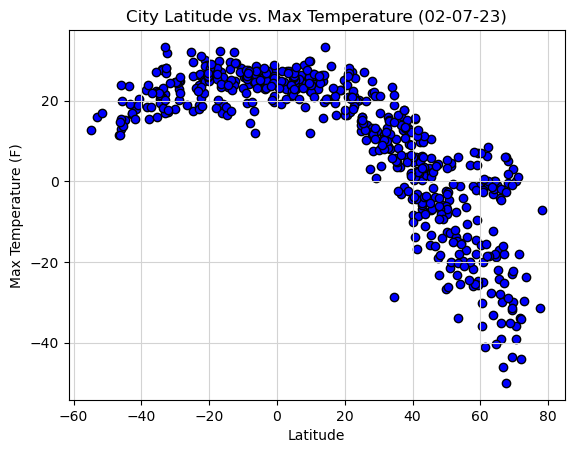

In [51]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],edgecolors="black",facecolors="blue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (02-07-23)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (visible=True,which="major",axis="both",linestyle="-",color="lightgrey")

# Save the figure
plt.savefig(r"C:\Users\willm\uta\hw\Module 6 Challenge\python-api-challenge\Starter_Code\output_data\Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

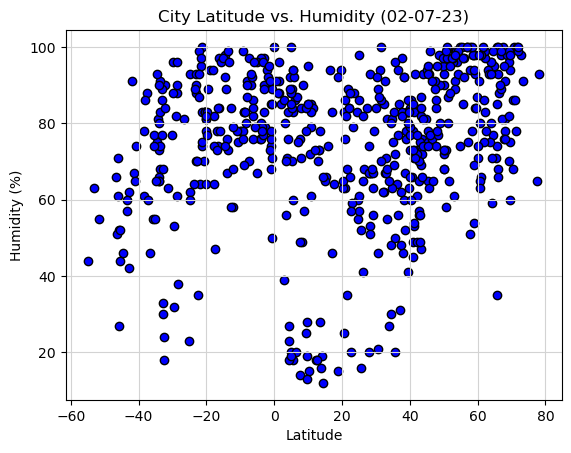

In [56]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],edgecolors="black",facecolors="blue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (02-07-23)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid (visible=True,which="major",axis="both",linestyle="-",color="lightgrey")
# Save the figure
plt.savefig(r"C:\Users\willm\uta\hw\Module 6 Challenge\python-api-challenge\Starter_Code\output_data\Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

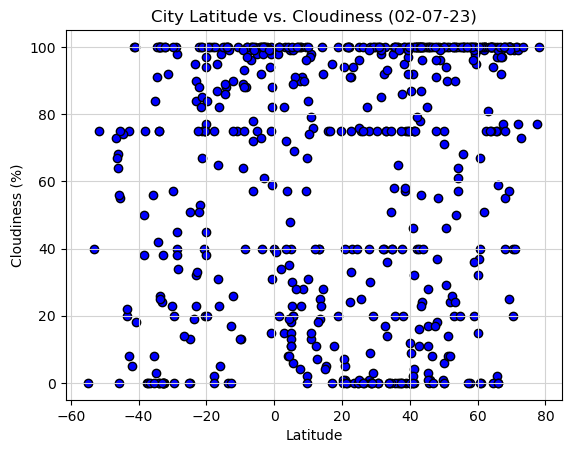

In [57]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],edgecolors="black",facecolors="blue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (02-07-23)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (visible=True,which="major",axis="both",linestyle="-",color="lightgrey")
# Save the figure
plt.savefig(r"C:\Users\willm\uta\hw\Module 6 Challenge\python-api-challenge\Starter_Code\output_data\Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

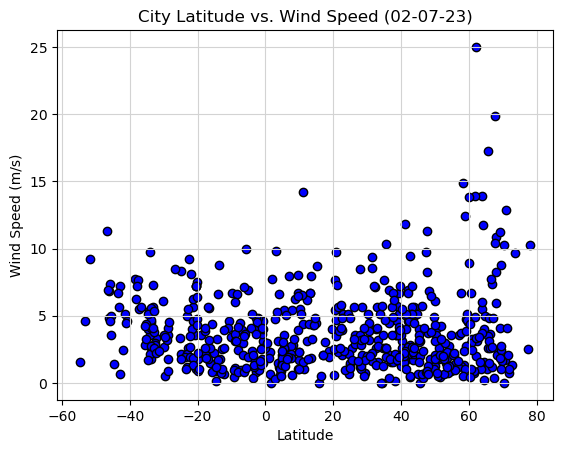

In [58]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],edgecolors="black",facecolors="blue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (02-07-23)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid (visible=True,which="major",axis="both",linestyle="-",color="lightgrey")
# Save the figure
plt.savefig(r"C:\Users\willm\uta\hw\Module 6 Challenge\python-api-challenge\Starter_Code\output_data\Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [67]:
# Define a function to create Linear Regression plots
def linear_function(x,y):
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.scatter(x, y)
    plt.plot(x, p(x),color="red")
    formula="Y = "+str(round(z[0],2))+"X" +" + "+str(round(z[1],2))
    plt.text(x.median(),y.median(),formula, fontsize = 15,color="red")
    result = linregress(x, y)
    print(f"R-squared: {result.rvalue**2:.6f}")
    
                

In [68]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,guerrero negro,27.9769,-114.0611,22.00,20,1,1.17,MX,1675813572
1,mayo,38.8876,-76.5119,9.26,78,0,4.63,US,1675813221
2,butaritari,3.0707,172.7902,27.27,80,100,9.84,KI,1675813323
3,veraval,20.9000,70.3667,20.90,63,1,3.50,IN,1675813272
5,tasiilaq,65.6145,-37.6368,-16.91,35,2,17.27,GL,1675813076


In [69]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,graaff-reinet,-32.2522,24.5308,17.18,90,100,3.38,ZA,1675813573
6,port alfred,-33.5906,26.8910,21.21,91,100,1.79,ZA,1675813574
7,atuona,-9.8000,-139.0333,25.86,78,13,6.68,PF,1675813505
9,launceston,-41.4500,147.1667,17.97,67,100,5.14,AU,1675813550
10,punta arenas,-53.1500,-70.9167,16.06,63,40,4.63,CL,1675813578


###  Temperature vs. Latitude Linear Regression Plot

R-squared: 0.711524


Text(0.5, 0, 'Latitude')

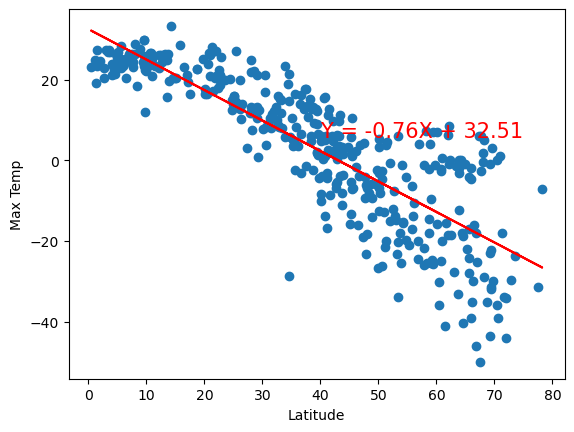

In [70]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]
linear_function(x, y)
plt.ylabel("Max Temp")
plt.xlabel("Latitude")

R-squared: 0.213945


Text(0.5, 0, 'Latitude')

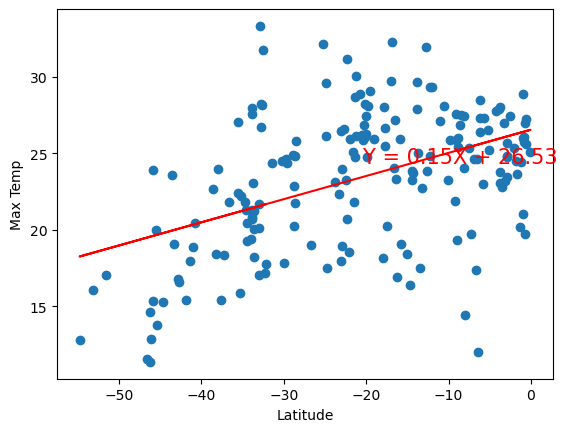

In [71]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]
linear_function(x, y)
plt.ylabel("Max Temp")
plt.xlabel("Latitude")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

R-squared: 0.145675


Text(0.5, 0, 'Latitude')

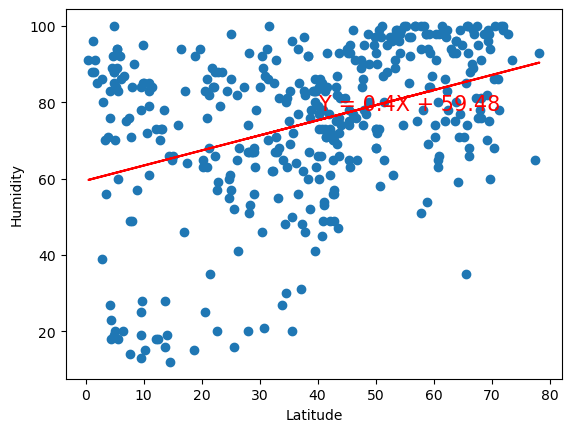

In [82]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Humidity"]
linear_function(x, y)
plt.ylabel("Humidity")
plt.xlabel("Latitude")

R-squared: 0.209144


Text(0.5, 0, 'Latitude')

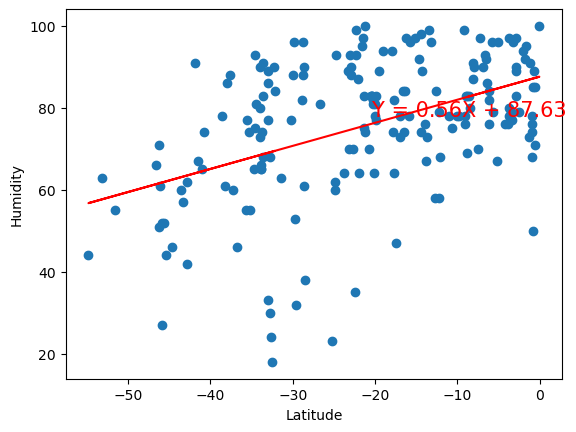

In [75]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]
linear_function(x, y)
plt.ylabel("Humidity")
plt.xlabel("Latitude")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

R-squared: 0.054543


Text(0.5, 0, 'Latitude')

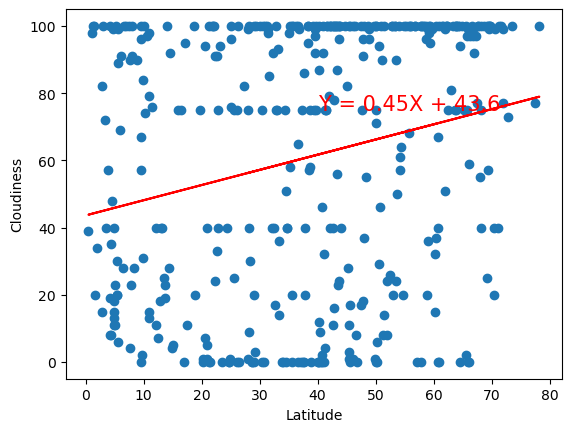

In [74]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Cloudiness"]
linear_function(x, y)
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

R-squared: 0.152046


Text(0.5, 0, 'Latitude')

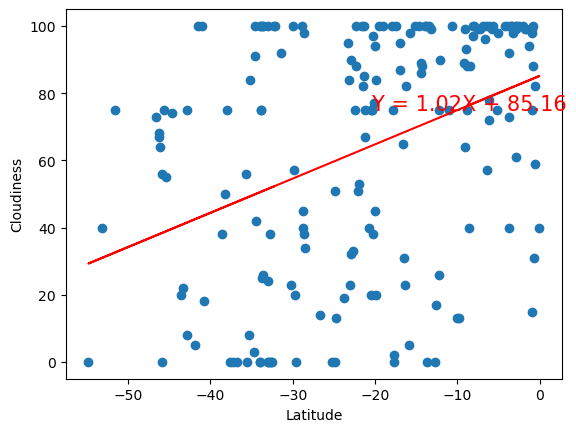

In [78]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Cloudiness"]
linear_function(x, y)
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

R-squared: 0.015962


Text(0.5, 0, 'Latitude')

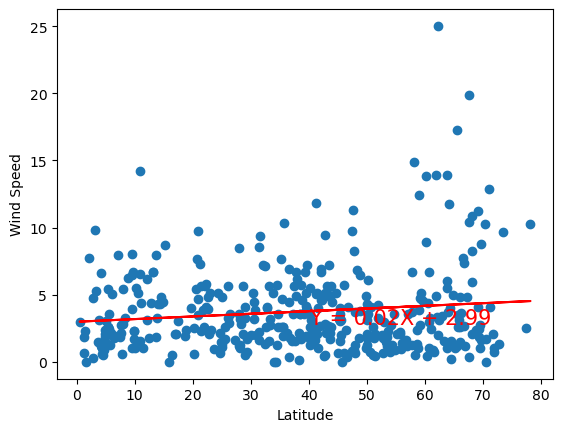

In [79]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Wind Speed"]
linear_function(x, y)
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")

R-squared: 0.098661


Text(0.5, 0, 'Humidity')

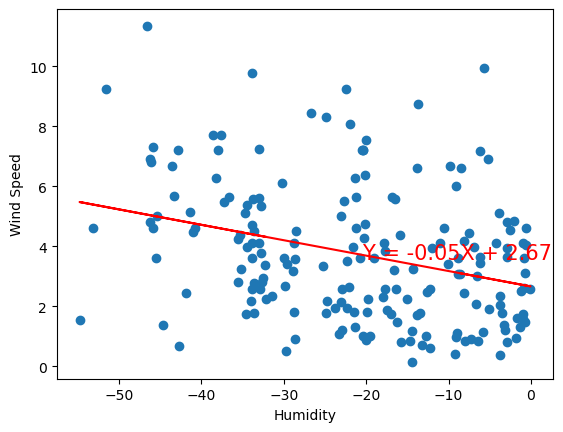

In [81]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Wind Speed"]
linear_function(x, y)
plt.ylabel("Wind Speed")
plt.xlabel("Humidity")

**Discussion about the linear relationship:** YOUR RESPONSE HERE